# Coercion clustering techniques krok 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/wmoszczy/2/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data['Pieczywo'] = round(data['Fresh']/1000,2)
data['Mleko'] = round(data['Milk']/1000,2)
data['Art_przeysłowe'] = round(data['Grocery']/700,2)
data['Mrożonki'] = round(data['Frozen']/300,2)
data['Chemia'] = round(data['Detergents_Paper']/400,2)
data['Słodycze'] = round(data['Delicassen']/500,2)
data['Napoje'] = round((data['Milk']+data['Delicassen'])/950,2)

del data['Fresh']
del data['Milk']
del data['Frozen']
del data['Detergents_Paper']
del data['Delicassen']
del data['Grocery']


data.head(12)

,Channel,Region,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje
0,2,3,12.67,9.66,10.80,0.71,6.68,2.68,11.57
1,2,3,7.06,9.81,13.67,5.87,8.23,3.55,12.20
2,2,3,6.35,8.81,10.98,8.02,8.79,15.69,17.53
3,1,3,13.26,1.20,6.03,21.35,1.27,3.58,3.14
4,2,3,22.62,5.41,10.28,13.05,4.44,10.37,11.15
5,2,3,9.41,8.26,7.32,2.22,4.49,2.90,10.22
6,2,3,12.13,3.20,9.96,1.60,7.85,1.09,3.94
7,2,3,7.58,4.96,13.47,5.56,8.30,5.13,7.92
8,1,3,5.96,3.65,8.85,1.42,4.29,1.50,4.63
9,2,3,6.01,11.09,26.97,3.86,18.56,4.20,13.89


In [4]:
## 440 klientów według 7 cech

data.shape

(440, 9)

In [5]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

## NORMALIZACJA

In [7]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje
0,0.083796,0.125694,0.530847,0.404734,0.452498,0.029748,0.279878,0.112287,0.484759
1,0.081005,0.121508,0.285949,0.397332,0.553672,0.237751,0.333337,0.143785,0.494133
2,0.065006,0.097510,0.206395,0.286353,0.356885,0.260675,0.285703,0.509975,0.569781
3,0.037696,0.113088,0.499847,0.045235,0.227306,0.804807,0.047874,0.134951,0.118365
4,0.060816,0.091224,0.687832,0.164508,0.312595,0.396826,0.135012,0.315332,0.339050


##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

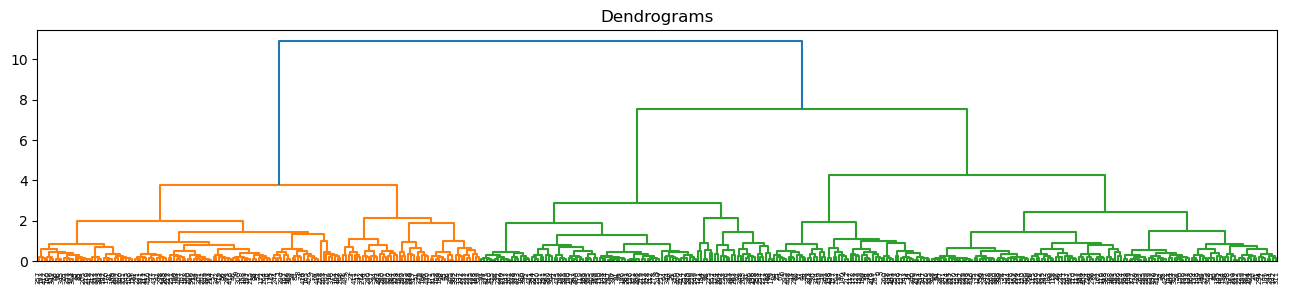

In [8]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Oś x zawiera próbki, a oś y przedstawia odległość między tymi próbkami. Linia pionowa z maksymalną odległością jest linią niebieską, dlatego możemy ustalić próg 6 i wyciąć dendrogram:

## Co to za próbki?

In [9]:
data2 = data.head(20)

In [10]:
data_scaled2 = normalize(data2)
data_scaled2 = pd.DataFrame(data_scaled2, columns=data2.columns)
data_scaled2

,Channel,Region,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje
0,0.083796,0.125694,0.530847,0.404734,0.452498,0.029748,0.279878,0.112287,0.484759
1,0.081005,0.121508,0.285949,0.397332,0.553672,0.237751,0.333337,0.143785,0.494133
2,0.065006,0.097510,0.206395,0.286353,0.356885,0.260675,0.285703,0.509975,0.569781
3,0.037696,0.113088,0.499847,0.045235,0.227306,0.804807,0.047874,0.134951,0.118365
4,0.060816,0.091224,0.687832,0.164508,0.312595,0.396826,0.135012,0.315332,0.339050
5,0.105219,0.157828,0.495054,0.434553,0.385101,0.116793,0.236216,0.152567,0.537668
6,0.106832,0.160249,0.647938,0.170932,0.532025,0.085466,0.419317,0.058224,0.210460
7,0.092713,0.139070,0.351383,0.229929,0.624424,0.257743,0.384760,0.237810,0.367145
8,0.074273,0.222820,0.442668,0.271097,0.657318,0.105468,0.318632,0.111410,0.343885
9,0.052174,0.078261,0.156783,0.289305,0.703568,0.100696,0.484176,0.109566,0.362349


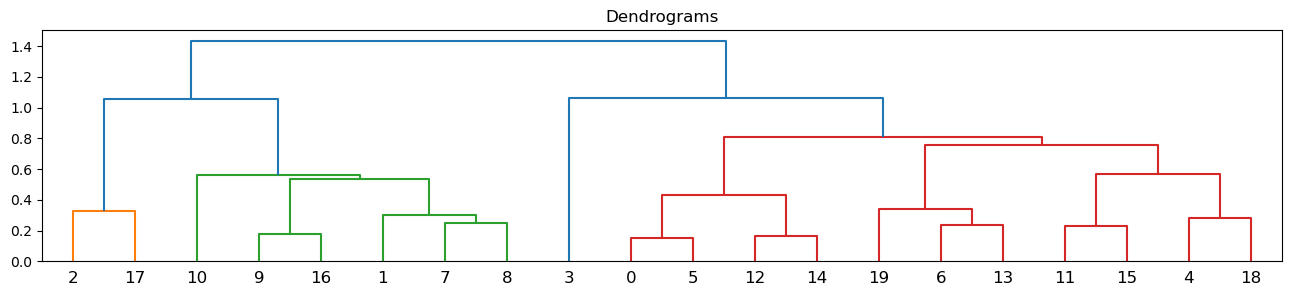

In [11]:
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled2, method='ward'))

# Analizujemy próbkę ('transakcji') 6 i 13

In [12]:
data_scaled2.loc[[6, 13], :]

,Channel,Region,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje
6,0.106832,0.160249,0.647938,0.170932,0.532025,0.085466,0.419317,0.058224,0.210460
13,0.053445,0.080167,0.567048,0.165946,0.571858,0.275775,0.448134,0.032067,0.191599


# Analizujemy próbkę ('transakcji') 11 i 15

In [13]:
data_scaled2.loc[[11, 15], :]

,Channel,Region,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje
11,0.124741,0.187112,0.820175,0.069855,0.402915,0.295013,0.085448,0.061747,0.106654
15,0.079829,0.239486,0.818244,0.088610,0.435865,0.105374,0.192387,0.065460,0.128524


## Czy można takie coś zrobić dla klientów a nie dla transakcji?

Tworzę grupę 100 fikcyjnych klientów

In [14]:
data7 = data

In [15]:
data7['ID_custom1'] = (data7['Pieczywo']*4)+(data7['Mrożonki']*3)+ data7['Art_przeysłowe']+(data7['Mleko']/2)

In [16]:
data7['ID_customer'] = pd.qcut(data7['ID_custom1'],100)

In [17]:
data7['ID_customer'].value_counts()

(3.459, 9.679]      5
(47.894, 48.244]    5
(53.515, 55.504]    5
(58.399, 59.362]    5
(62.133, 62.633]    5
                   ..
(86.795, 88.011]    4
(34.626, 35.164]    4
(89.422, 90.914]    4
(90.914, 92.858]    4
(70.722, 73.191]    4
Name: ID_customer, Length: 100, dtype: int64

### Koduje przedziały robiąc z nich ID

In [18]:
data7['ID_customer'] = pd.Categorical(data7['ID_customer']).codes
data7['ID_customer'].value_counts()

71    5
41    5
61    5
92    5
12    5
     ..
80    4
13    4
57    4
49    4
77    4
Name: ID_customer, Length: 100, dtype: int64

In [19]:
#data7.reset_index()
#data7 = data7.set_index(data7.ID_customer) 
#del data7.ID_customer
#del data7.ID_custom2
#del data7.ID_custom1

data7 

,Channel,Region,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje,ID_custom1,ID_customer
0,2,3,12.67,9.66,10.80,0.71,6.68,2.68,11.57,68.440,47
1,2,3,7.06,9.81,13.67,5.87,8.23,3.55,12.20,64.425,43
2,2,3,6.35,8.81,10.98,8.02,8.79,15.69,17.53,64.845,43
3,1,3,13.26,1.20,6.03,21.35,1.27,3.58,3.14,123.720,78
4,2,3,22.62,5.41,10.28,13.05,4.44,10.37,11.15,142.615,82
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29.70,12.05,22.90,43.78,0.46,4.41,15.01,279.065,97
436,1,3,39.23,1.43,1.09,15.03,0.23,4.69,3.98,203.815,93
437,2,3,14.53,15.49,43.20,1.46,37.10,3.73,18.27,113.445,74
438,1,3,10.29,1.98,3.19,3.46,0.42,4.25,4.32,55.720,36


In [20]:
data7 = data7[['ID_customer', 'Pieczywo', 'Mleko',
       'Art_przeysłowe', 'Mrożonki', 'Chemia', 'Słodycze', 'Napoje']]
data7

,ID_customer,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje
0,47,12.67,9.66,10.80,0.71,6.68,2.68,11.57
1,43,7.06,9.81,13.67,5.87,8.23,3.55,12.20
2,43,6.35,8.81,10.98,8.02,8.79,15.69,17.53
3,78,13.26,1.20,6.03,21.35,1.27,3.58,3.14
4,82,22.62,5.41,10.28,13.05,4.44,10.37,11.15
...,...,...,...,...,...,...,...,...
435,97,29.70,12.05,22.90,43.78,0.46,4.41,15.01
436,93,39.23,1.43,1.09,15.03,0.23,4.69,3.98
437,74,14.53,15.49,43.20,1.46,37.10,3.73,18.27
438,36,10.29,1.98,3.19,3.46,0.42,4.25,4.32


In [21]:
data7.values

array([[47.  , 12.67,  9.66, ...,  6.68,  2.68, 11.57],
       [43.  ,  7.06,  9.81, ...,  8.23,  3.55, 12.2 ],
       [43.  ,  6.35,  8.81, ...,  8.79, 15.69, 17.53],
       ...,
       [74.  , 14.53, 15.49, ..., 37.1 ,  3.73, 18.27],
       [36.  , 10.29,  1.98, ...,  0.42,  4.25,  4.32],
       [ 4.  ,  2.79,  1.7 , ...,  1.19,  0.1 ,  1.84]])

In [22]:
data7.columns

Index(['ID_customer', 'Pieczywo', 'Mleko', 'Art_przeysłowe', 'Mrożonki',
       'Chemia', 'Słodycze', 'Napoje'],
      dtype='object')

In [23]:
#del data7['ID_custom1']
data7 = data7[['ID_customer', 'Pieczywo', 'Mleko', 'Art_przeysłowe', 'Mrożonki',
       'Chemia', 'Słodycze', 'Napoje']]

data7 

,ID_customer,Pieczywo,Mleko,Art_przeysłowe,Mrożonki,Chemia,Słodycze,Napoje
0,47,12.67,9.66,10.80,0.71,6.68,2.68,11.57
1,43,7.06,9.81,13.67,5.87,8.23,3.55,12.20
2,43,6.35,8.81,10.98,8.02,8.79,15.69,17.53
3,78,13.26,1.20,6.03,21.35,1.27,3.58,3.14
4,82,22.62,5.41,10.28,13.05,4.44,10.37,11.15
...,...,...,...,...,...,...,...,...
435,97,29.70,12.05,22.90,43.78,0.46,4.41,15.01
436,93,39.23,1.43,1.09,15.03,0.23,4.69,3.98
437,74,14.53,15.49,43.20,1.46,37.10,3.73,18.27
438,36,10.29,1.98,3.19,3.46,0.42,4.25,4.32


## TABELA PRZESTAWNA OPARTA NA DOMINANCIE

In [24]:
PA7 = data7.pivot_table(index=['ID_customer'],
               values=['Pieczywo', 'Mleko', 'Art_przeysłowe',
       'Mrożonki', 'Chemia', 'Słodycze', 'Napoje'],
               aggfunc='mean').reset_index()

PA7



,ID_customer,Art_przeysłowe,Chemia,Mleko,Mrożonki,Napoje,Pieczywo,Słodycze
0,0,3.0240,0.4520,0.6980,0.7160,0.9300,0.4240,0.3700
1,1,2.6525,1.3300,2.4725,1.8975,2.6625,0.4050,0.1100
2,2,3.3140,1.9780,2.1440,1.7000,2.6100,0.8400,0.6740
3,3,6.5975,3.3375,2.3050,1.4625,3.0775,0.6025,1.2375
4,4,5.0200,3.4050,3.7425,1.3375,4.9400,1.2150,1.9050
...,...,...,...,...,...,...,...,...
95,95,36.8400,27.5800,13.3725,24.0850,17.0825,30.5150,5.7175
96,96,9.3725,3.2000,5.2275,18.8850,9.9250,47.7900,8.4025
97,97,25.1660,14.4080,15.7760,37.7360,19.0460,36.6700,4.6320
98,98,25.4100,15.7550,15.5800,51.2375,20.2100,45.2225,7.2425


## NORMALIZACJA PA7

In [25]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler (feature_range = (0, 1)) 

PA8 = PA7

PA8[['Pieczywo', 'Mleko', 'Art_przeysłowe', 'Mrożonki',
       'Art_przeysłowe', 'Słodycze','Napoje']] = scaler.fit_transform (PA8[['Pieczywo', 
                                                                            'Mleko',
                                                                            'Art_przeysłowe',
                                                                            'Mrożonki',
                                                                            'Art_przeysłowe',
                                                                            'Słodycze',
                                                                            'Napoje']])
PA8

,ID_customer,Art_przeysłowe,Chemia,Mleko,Mrożonki,Napoje,Pieczywo,Słodycze
0,0,0.028206,0.4520,0.000000,0.000000,0.000000,0.000304,0.009962
1,1,0.017530,1.3300,0.081029,0.012004,0.051940,0.000000,0.000000
2,2,0.036540,1.9780,0.066029,0.009997,0.050366,0.006971,0.021609
3,3,0.130900,3.3375,0.073381,0.007584,0.064381,0.003165,0.043199
4,4,0.085566,3.4050,0.139021,0.006314,0.120218,0.012980,0.068774
...,...,...,...,...,...,...,...,...
95,95,1.000000,27.5800,0.578758,0.237422,0.484246,0.482509,0.214847
96,96,0.210647,3.2000,0.206831,0.184592,0.269667,0.759338,0.317720
97,97,0.664516,14.4080,0.688509,0.376112,0.543111,0.581142,0.173257
98,98,0.671528,15.7550,0.679559,0.513284,0.578007,0.718195,0.273276


In [26]:
PA8.columns

Index(['ID_customer', 'Art_przeysłowe', 'Chemia', 'Mleko', 'Mrożonki',
       'Napoje', 'Pieczywo', 'Słodycze'],
      dtype='object')

In [27]:
PA8

,ID_customer,Art_przeysłowe,Chemia,Mleko,Mrożonki,Napoje,Pieczywo,Słodycze
0,0,0.028206,0.4520,0.000000,0.000000,0.000000,0.000304,0.009962
1,1,0.017530,1.3300,0.081029,0.012004,0.051940,0.000000,0.000000
2,2,0.036540,1.9780,0.066029,0.009997,0.050366,0.006971,0.021609
3,3,0.130900,3.3375,0.073381,0.007584,0.064381,0.003165,0.043199
4,4,0.085566,3.4050,0.139021,0.006314,0.120218,0.012980,0.068774
...,...,...,...,...,...,...,...,...
95,95,1.000000,27.5800,0.578758,0.237422,0.484246,0.482509,0.214847
96,96,0.210647,3.2000,0.206831,0.184592,0.269667,0.759338,0.317720
97,97,0.664516,14.4080,0.688509,0.376112,0.543111,0.581142,0.173257
98,98,0.671528,15.7550,0.679559,0.513284,0.578007,0.718195,0.273276


In [28]:
F = PA8[['Pieczywo', 'Art_przeysłowe', 'Chemia', 'Mleko',
       'Mrożonki', 'Napoje', 'Słodycze']].values
F

array([[3.04472541e-04, 2.82060493e-02, 4.52000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.96168582e-03],
       [0.00000000e+00, 1.75299950e-02, 1.33000000e+00, 8.10292472e-02,
        1.20036981e-02, 5.19396810e-02, 0.00000000e+00],
       [6.97081871e-03, 3.65399813e-02, 1.97800000e+00, 6.60289048e-02,
        9.99715528e-03, 5.03657513e-02, 2.16091954e-02],
       [3.16491194e-03, 1.30900208e-01, 3.33750000e+00, 7.33806708e-02,
        7.58422400e-03, 6.43812208e-02, 4.31992337e-02],
       [1.29801452e-02, 8.55664918e-02, 3.40500000e+00, 1.39021439e-01,
        6.31426017e-03, 1.20218252e-01, 6.87739464e-02],
       [2.53673702e-02, 5.41849271e-02, 4.06200000e+00, 1.01920135e-01,
        1.06067379e-02, 8.70607987e-02, 5.04980843e-02],
       [1.01357307e-02, 2.28895754e-01, 7.25750000e+00, 1.36738282e-01,
        9.00658349e-03, 1.12048807e-01, 5.23946360e-02],
       [1.85407753e-02, 1.80285940e-01, 4.66000000e+00, 2.03566291e-01,
        9.30629496e-03, 1

##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

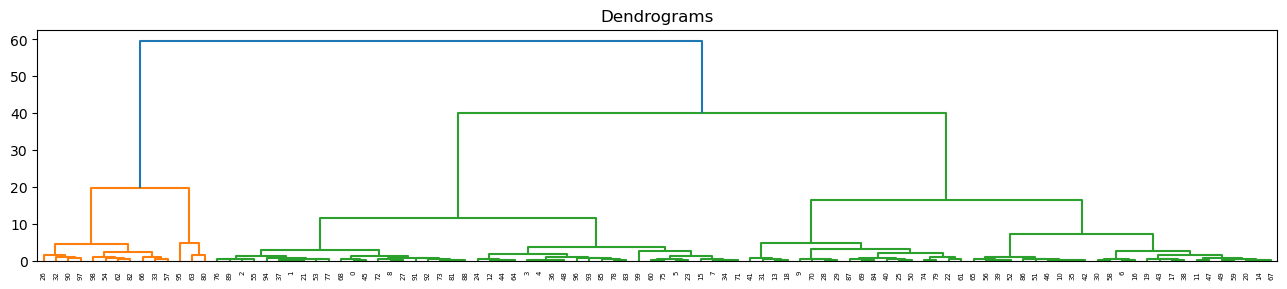

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(F, method='ward'))

# Analizujemy próbkę ('klientów')  13 i 14

PA8.loc[[13, 14], :]

# Analizujemy próbkę ('klientów') 5 i 6

PA8.loc[[5, 6], :]

# Analizujemy próbkę ('klientów') 13 i 6

PA8.loc[[13, 6], :]

# Klienci zostali przypisani -- TWORZYMY 3 KLASTRY

DLACZEGO TRZY ---> BO W POŁOWIE OSI Y jest wartość 25/2 = 13 
na wysokości 13 są 3 gałęzie

In [43]:
from sklearn.cluster import AgglomerativeClustering

F = PA8[['Pieczywo', 'Art_przeysłowe', 'Chemia', 'Mleko',
       'Mrożonki', 'Napoje', 'Słodycze']].values

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
PA8['cluster']= cluster.fit_predict(F)

In [44]:
PA8['cluster']

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    0
97    3
98    3
99    0
Name: cluster, Length: 100, dtype: int64

In [45]:
PA8.columns

Index(['ID_customer', 'Art_przeysłowe', 'Chemia', 'Mleko', 'Mrożonki',
       'Napoje', 'Pieczywo', 'Słodycze', 'cluster'],
      dtype='object')

In [46]:
PA8

,ID_customer,Art_przeysłowe,Chemia,Mleko,Mrożonki,Napoje,Pieczywo,Słodycze,cluster
0,0,0.028206,0.4520,0.000000,0.000000,0.000000,0.000304,0.009962,0
1,1,0.017530,1.3300,0.081029,0.012004,0.051940,0.000000,0.000000,0
2,2,0.036540,1.9780,0.066029,0.009997,0.050366,0.006971,0.021609,0
3,3,0.130900,3.3375,0.073381,0.007584,0.064381,0.003165,0.043199,0
4,4,0.085566,3.4050,0.139021,0.006314,0.120218,0.012980,0.068774,0
...,...,...,...,...,...,...,...,...,...
95,95,1.000000,27.5800,0.578758,0.237422,0.484246,0.482509,0.214847,1
96,96,0.210647,3.2000,0.206831,0.184592,0.269667,0.759338,0.317720,0
97,97,0.664516,14.4080,0.688509,0.376112,0.543111,0.581142,0.173257,3
98,98,0.671528,15.7550,0.679559,0.513284,0.578007,0.718195,0.273276,3


Text(0.5, 1.0, '5 KLASTRÓW dla Mleka i Pieczywa')

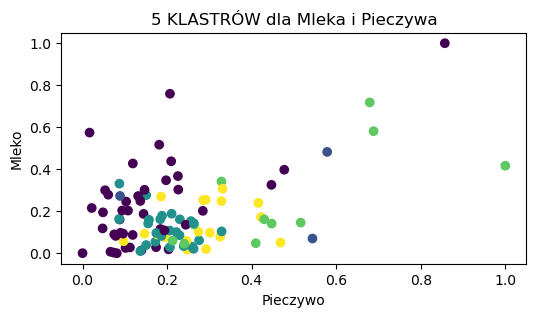

In [49]:
plt.figure(figsize=(6, 3))  
plt.scatter(PA8['Mleko'], PA8['Pieczywo'], c=cluster.labels_)
plt.ylabel('Mleko')
plt.xlabel('Pieczywo')
plt.title ('5 KLASTRÓW dla Mleka i Pieczywa')


MAMY TUTAJ 8 WYMIARÓW PORÓWNAŃ, gdyby były dwa wymiary byłoby lepie widać, że mechanizm działa dobrze 

# KLASTROWNANIE DLA DWÓCH PRODUKTÓW

In [34]:
PA8.columns

Index(['ID_customer', 'Art_przeysłowe', 'Chemia', 'Mleko', 'Mrożonki',
       'Napoje', 'Pieczywo', 'Słodycze', 'cluster'],
      dtype='object')

In [35]:
X = PA8[['Pieczywo', 'Mleko']].values
X

array([[3.04472541e-04, 0.00000000e+00],
       [0.00000000e+00, 8.10292472e-02],
       [6.97081871e-03, 6.60289048e-02],
       [3.16491194e-03, 7.33806708e-02],
       [1.29801452e-02, 1.39021439e-01],
       [2.53673702e-02, 1.01920135e-01],
       [1.01357307e-02, 1.36738282e-01],
       [1.85407753e-02, 2.03566291e-01],
       [2.76829640e-02, 1.02034293e-01],
       [1.73869846e-02, 2.47471403e-01],
       [3.39246511e-02, 2.39274869e-01],
       [2.11127670e-02, 2.62768556e-01],
       [2.86684935e-02, 1.73976575e-01],
       [2.00310882e-02, 2.92221284e-01],
       [5.48451196e-02, 1.72355533e-01],
       [2.74506033e-02, 1.12057353e-01],
       [3.09280003e-02, 2.59001347e-01],
       [3.89885102e-02, 1.50505719e-01],
       [5.72889124e-02, 9.72396630e-02],
       [6.13351922e-02, 2.75668394e-01],
       [2.84120956e-02, 2.06762711e-01],
       [9.33448712e-02, 9.60980844e-02],
       [5.90115860e-02, 2.45873193e-01],
       [8.24159095e-02, 7.84492797e-02],
       [8.977933

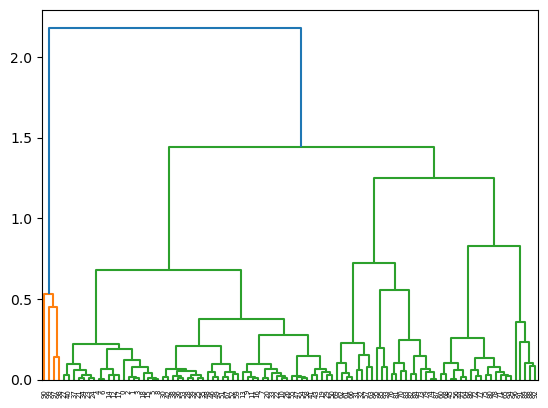

In [36]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [37]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 2, 4, 0, 0, 0, 4, 4,
       0, 2, 4, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0,
       3, 3, 1, 3, 3, 0, 4, 0, 3, 1, 1, 1])

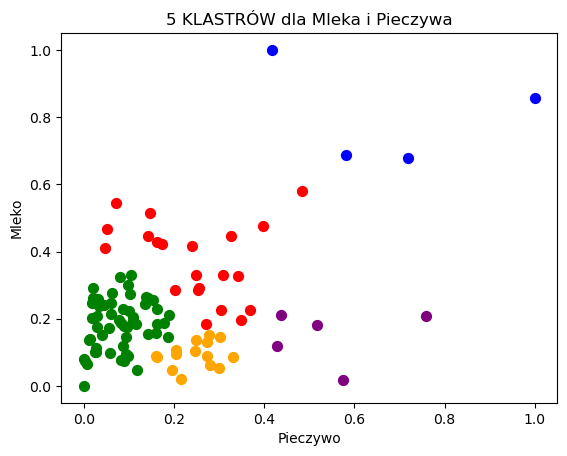

In [50]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.ylabel('Mleko')
plt.xlabel('Pieczywo')
plt.title ('5 KLASTRÓW dla Mleka i Pieczywa')


plt.show()

In [39]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 2, 4, 0, 0, 0, 4, 4,
       0, 2, 4, 0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0,
       3, 3, 1, 3, 3, 0, 4, 0, 3, 1, 1, 1])

## WYBÓR WŁAŚCIWEJ METODY POMIARU PODOBIEŃSTWA

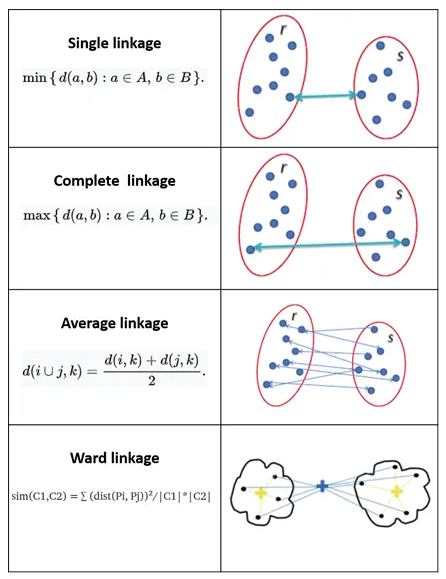

WYBÓR: 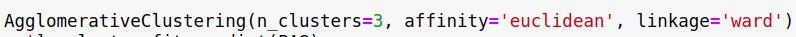

...